# Consigna 1

Probar que $\quad (I − A)^{-1}$ = $I + A + A^{2} + A^{3} +....+ A^{n} \quad $ con $n \rightarrow ∞$ $\quad \Longrightarrow \quad \displaystyle \lim_{n \to \infty} A^{n+1} = 0$

Para esto podemos multiplicar a ambos lados por $(I − A)$ por izquierda:


$(I − A)^{-1}(I − A)$ = $(I + A + A^{2} + A^{3} +....+ A^{n}$ = $I + A + A^{2} + A^{3} +....+ A^{n})(I − A)$

Notemos entonces:
- $(I − A)^{-1}(I − A)$ =  $I$
- $(I + A + A^{2} + A^{3} +....+ A^{n})(I − A)$ = $I + A + A^{2} + A^{3} +....+ A^{n} - (A + A^{2} + A^{3} +....+ A^{n} + A^{n+1})$ = $I - A^{n+1}$

Luego,

$I$ = $I - A^{n+1}$ $\Longrightarrow  A^{n+1} = 0$


Y como $n \rightarrow ∞$ $\Longrightarrow \displaystyle \lim_{n \to \infty} A^{n+1} = 0$

# Consigna 2

Comenzamos graficando, para las dos matrices $A_1$ y $A_2$, dos vectores definidos de la forma: $a_1(n) = ∥A^n_1∥_2$ y $a_2(n)=∥A^n_2∥2$. O sea, que cada uno de sus elementos representa la norma 2 de la matriz elevada a la potencia que corresponde a su índice (para esta parte se puede utilizar scipy.linalg.norm). Los vectores los definimos de largo $N = 250$.


In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [ ]:
#Comenzamos escribiendo las matrices A1 y A2
A1=np.array([[0.186, 0.521, 0.014, 0.32, 0.134], [0.24, 0.073, 0.219, 0.013, 0.327], [0.098, 0.12, 0.311, 0.302, 0.208],[0.173, 0.03, 0.133, 0.14, 0.074], [0.303, 0.256, 0.323, 0.225, 0.257]])
A2=np.array([[0.186, 0.521, 0.014, 0.32, 0.134], [0.24, 0.073, 0.219, 0.013, 0.327],[0.098, 0.12, 0.311, 0.302, 0.208], [0.173, 0.03, 0.133, 0.14, 0.074], [0.003, 0.256, 0.323, 0.225, 0.257]])
#Creamos los vectores v1 y v2
v1=np.zeros(shape = 250)
v2=np.zeros(shape=250)
#les asignamos el 1er valor
#(consideramos que las coordenadas de cada vector van de 1 a 250. De otra manera, el primer elemento sería la identidad y, luego, A1^1, A1^2, ..., A1^249; lo mismo ocurriría con A2)
v1[0]=scipy.linalg.norm(A1, ord = 2)
v2[0]=scipy.linalg.norm(A2, ord = 2)
#creamos las variables A1_i, A2_i para multiplicar A1 y A2 por sí mismas en cada coordenada
A1_i=A1
A2_i=A2
for i in range(1, 250):
  A1_i=A1_i@A1
  A2_i=A2_i@A2
  v1[i]=scipy.linalg.norm(A1_i, ord = 2)
  v2[i]=scipy.linalg.norm(A2_i, ord = 2)

posiciones = np.arange(250)

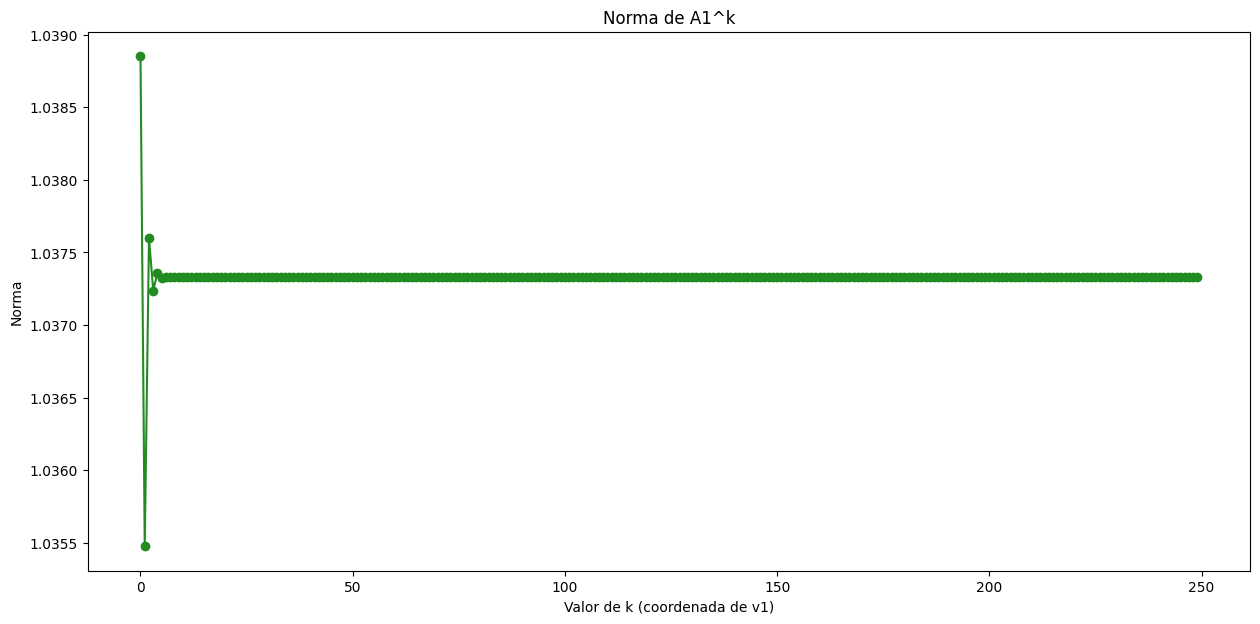

In [ ]:
#graficamos las coordenadas de v1
x=posiciones
y=v1
fig, ax = plt.subplots()
ax.plot(x, y, color = 'forestgreen', marker='o', linestyle='-')
plt.title("Norma de A1^k")
plt.xlabel("Valor de k (coordenada de v1)")
plt.ylabel("Norma")
fig.set_figheight(7)
fig.set_figwidth(15)

plt.show()

De la tendencia que muestran los puntos en este gráfico, podemos intuir que $||A1^{k}||_2 \nrightarrow 0$ cuando $k\rightarrow \infty$

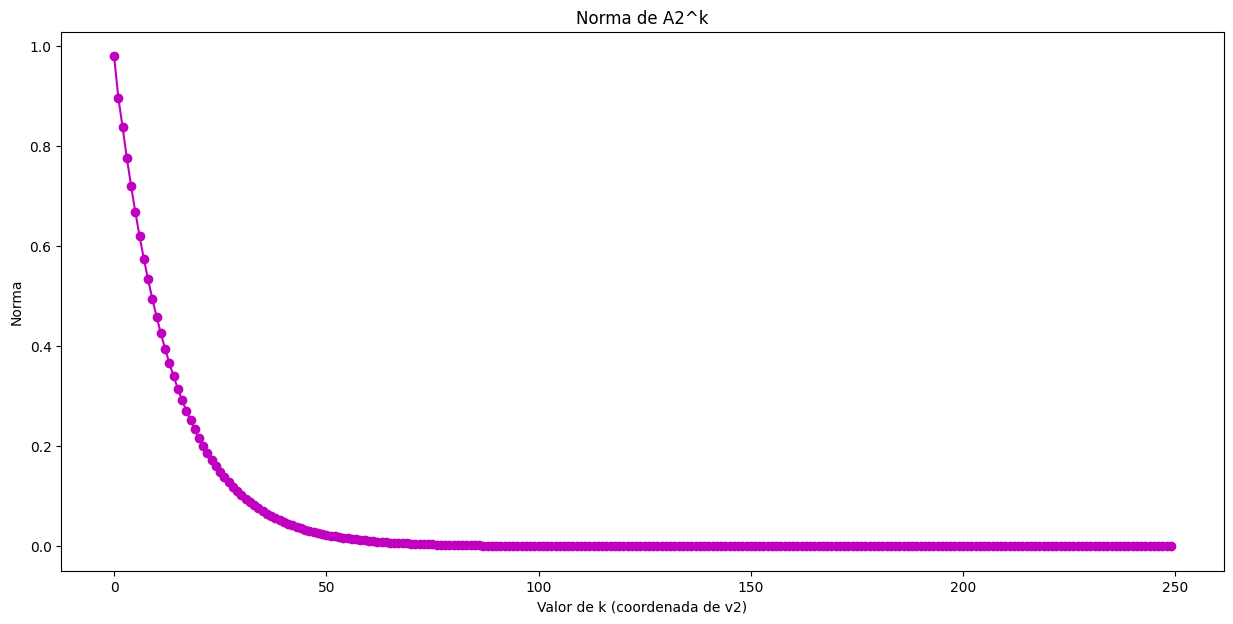

In [ ]:

#Ahora, graficamos las coordenadas de v2

x=posiciones
y=v2
fig, ax = plt.subplots()
ax.plot(x, y, color = 'm', marker='o', linestyle='-')
plt.title("Norma de A2^k")
plt.xlabel("Valor de k (coordenada de v2)")
plt.ylabel("Norma")
fig.set_figheight(7)
fig.set_figwidth(15)

Aquí sí, podemos pensar que  $||A1^{k}||_2 \rightarrow 0$ cuando $k\rightarrow \infty$

#Consigna 3

Mediante el método de la potencia, encontrar el mayor autovalor de las matrices A1 y A2. Implementar ese cálculo en la función metodoPotencia del archivo funciones.py.
Dado que el método de la potencia es inicializado con un vector aleatorio x0, vamos a hacer
el cálculo del autovalor estadísticamente con el método de Monte Carlo. Este procedimiento
repite la operación un número importante de veces (digamos 250). Se pide en la consigna
transcribir en una tabla el promedio de los autovalores de las 250 iteraciones de Monte Carlo
para cada matriz, poniendo además el desvío estandar encontrado.

In [ ]:
from funciones import  metodoPotencia, metodoMonteCarlo
import numpy as np

promedio_A1, desvio_A1 = metodoMonteCarlo(A1)
promedio_A2, desvio_A2 = metodoMonteCarlo(A2)

print("Matriz | Promedio Autovalor   | Desvío Estándar")
print(f"A1     | {promedio_A1:.7f}            | {desvio_A1:.7f}")
print(f"A2     | {promedio_A2:.7f}            | {desvio_A2:.7f}")

Matriz | Promedio Autovalor   | Desvío Estándar
A1     | 1.0000000            | 0.0000003
A2     | 0.9276514            | 0.0000002


# Consigna 4

**De forma similar a la consigna 2, graficar la serie de potencias $(I − A)^{−1}$ de $A_1$ y $A_2$ (siguiendo la ecuación 4) para para $n = 10$ y $n = 100$.**


Comenzamos, entonces, creando las aproximaciones de $(I-A1)^{-1}$ (L1) y $(I-A2)^{-1}$ (L2) siguiendo la ecuación 4

$L_1\_n=I+A_1^1+...+A_1^n$

$L_2\_n=I+A_2^1+...+A_2^n$

In [ ]:
#Comenzamos, entonces, creando L1 y L2 (en un principio son la identidad)

L1=np.zeros(A1.shape)
L2=np.zeros(A2.shape)

#Creamos A1_i, A2_i para iterar sobre ellas

A1_i=np.eye(A1.shape[0])
A2_i=np.eye(A2.shape[0])

#Y los vectores para guardar la norma de cada término de la serie de potencias

v1_10=np.zeros(shape = 11)
v2_10=np.zeros(shape=11)
v1_100=np.zeros(shape = 101)
v2_100=np.zeros(shape=101)

#Y comenzamos la iteración

for i in range(11):
  #Le sumamos la potencia de A correspondiente, comenzando por I
  L1+=A1_i
  L2+=A2_i
  #Guardamos la norma de cada término en el vector, para analizar la convergencia de la serie
  v1_10[i]=scipy.linalg.norm(L1, ord = 2)
  v2_10[i]=scipy.linalg.norm(L2, ord = 2)
  v1_100[i]=scipy.linalg.norm(L1, ord = 2)
  v2_100[i]=scipy.linalg.norm(L2, ord = 2)
  #Aumentamos en 1 la potencia de A, para sumárselo al término siguiente
  A1_i=A1_i@A1
  A2_i=A2_i@A2

#Continuamos con lo que falta para n=100

for i in range(11, 101):
  #Le sumamos la potencia de A correspondiente, comenzando por A ^10
  L1+=A1_i
  L2+=A2_i
  #Guardamos la norma de cada término en el vector, para analizar la convergencia de la serie
  v1_100[i]=scipy.linalg.norm(L1, ord = 2)
  v2_100[i]=scipy.linalg.norm(L2, ord = 2)
  #Aumentamos en 1 la potencia de A, para sumárselo al término siguiente
  A1_i=A1_i@A1
  A2_i=A2_i@A2

De esta manera, están listas las matrices $L_1$ y $L_2$, tanto para $n=10$ como para $n=100$. Ahora, graficamos la norma de cada término, para analizar la convergencia de la serie.

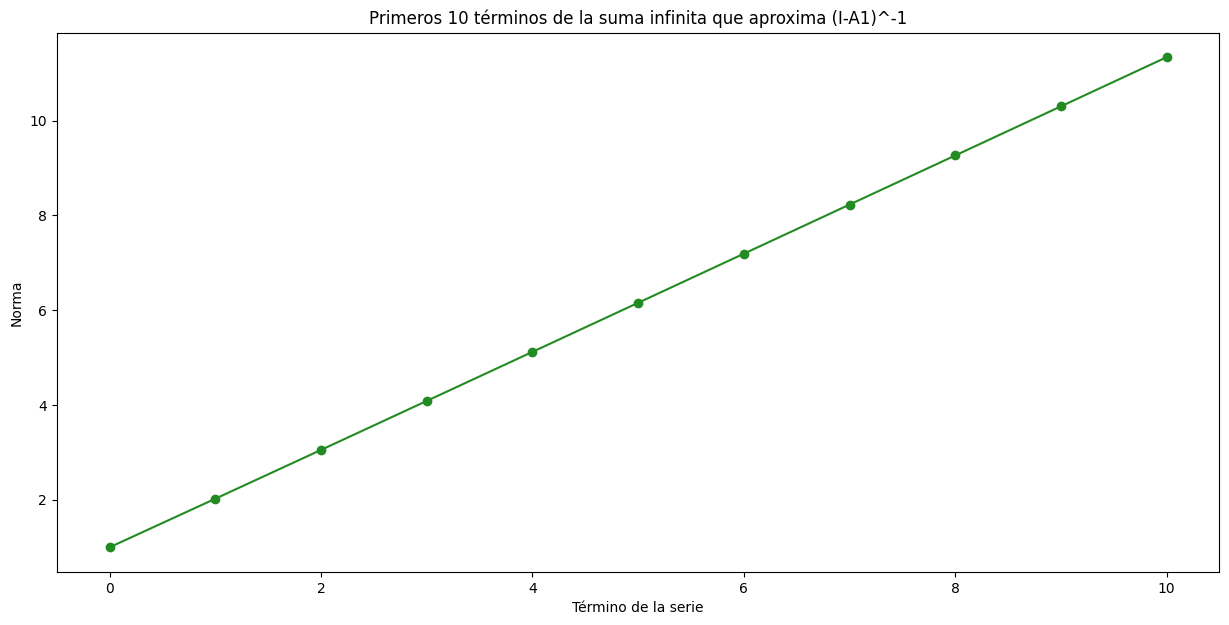

In [ ]:
#Graficamos las normas de la serie L1 para n=10
x=np.arange(11)
y=v1_10

fig, ax = plt.subplots()
ax.plot(x, y, color = 'forestgreen', marker='o', linestyle='-')
plt.title("Primeros 10 términos de la suma infinita que aproxima (I-A1)^-1")
plt.xlabel("Término de la serie")
plt.ylabel("Norma")
fig.set_figheight(7)
fig.set_figwidth(15)

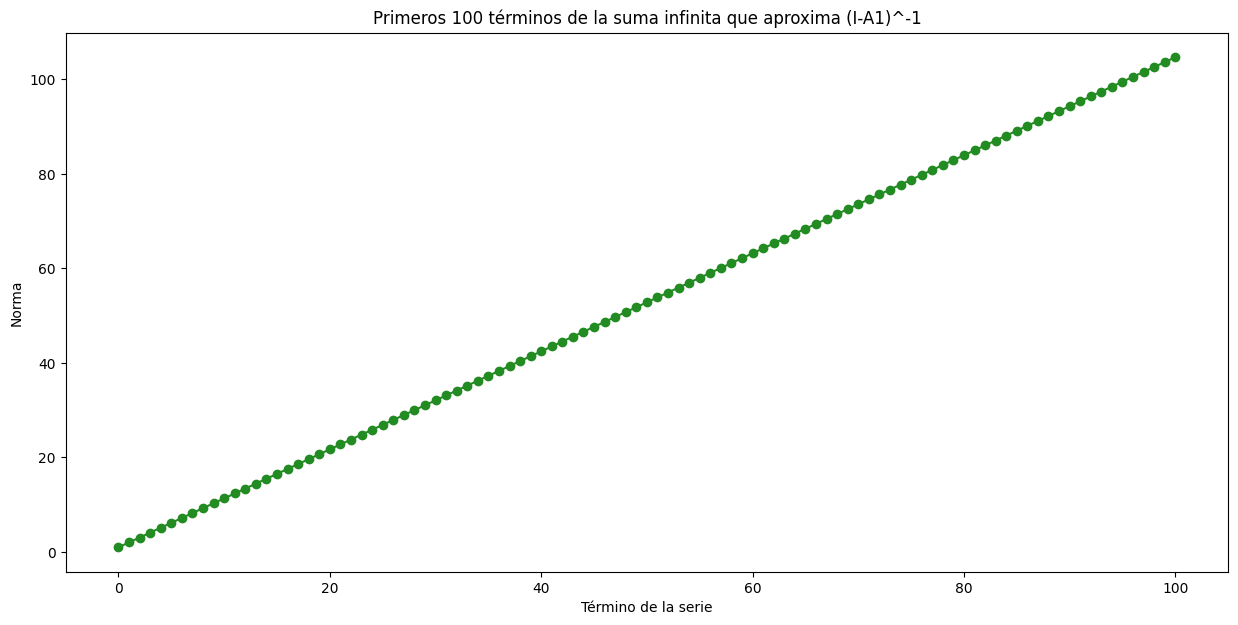

In [ ]:
#y para n=100

x=np.arange(101)
y=v1_100

fig, ax = plt.subplots()
ax.plot(x, y, color = 'forestgreen', marker='o', linestyle='-')
plt.title("Primeros 100 términos de la suma infinita que aproxima (I-A1)^-1")
plt.xlabel("Término de la serie")
plt.ylabel("Norma")
fig.set_figheight(7)
fig.set_figwidth(15)

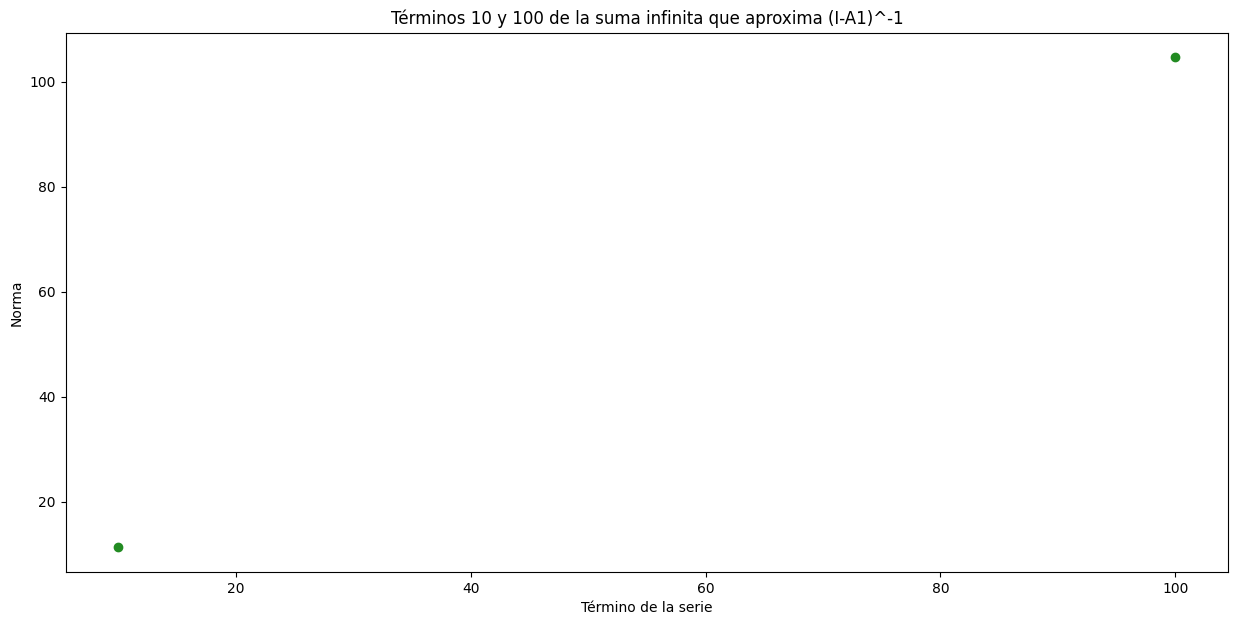

In [ ]:
#graficamos, también, los términos 10 y 100 en particular

x=[10,100]
y=[v1_10[10], v1_100[100]]

fig, ax = plt.subplots()
ax.scatter(x, y, color = 'forestgreen')
plt.title("Términos 10 y 100 de la suma infinita que aproxima (I-A1)^-1")
plt.xlabel("Término de la serie")
plt.ylabel("Norma")
fig.set_figheight(7)
fig.set_figwidth(15)

Esto nos lleva a pensar que resulta difícil garantizar una convergencia de la serie para A1. Analizamos qué ocurre para A2.

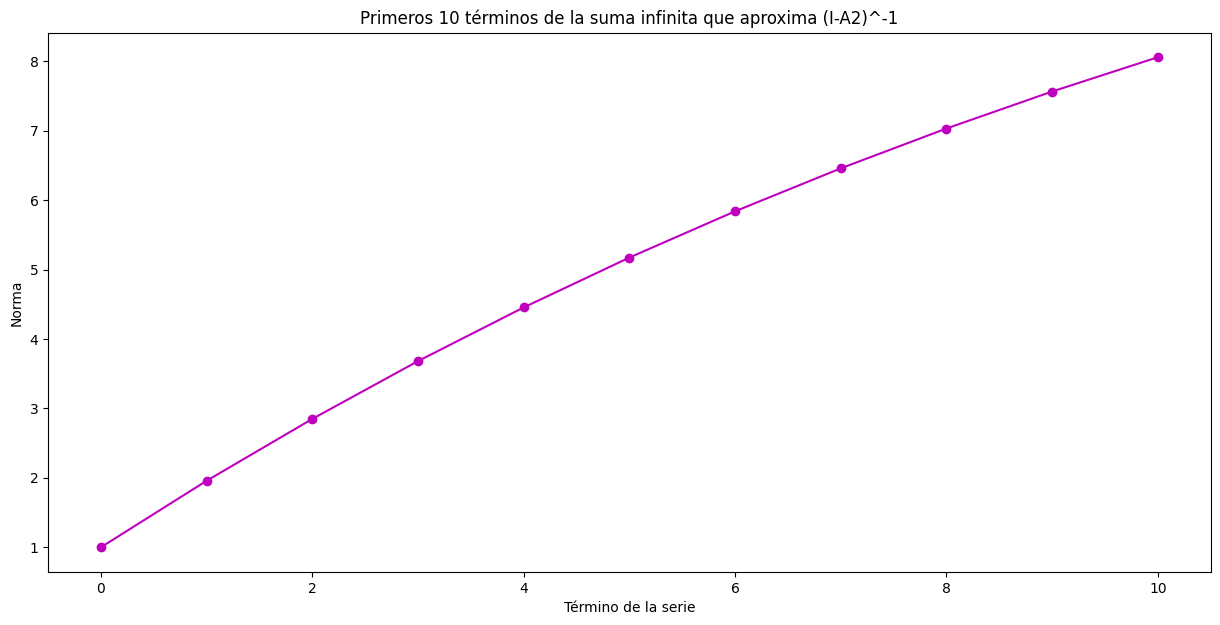

In [ ]:
#Con n=10

x=np.arange(11)
y=v2_10

fig, ax = plt.subplots()
ax.plot(x, y, color = 'm', marker='o', linestyle='-')
plt.title("Primeros 10 términos de la suma infinita que aproxima (I-A2)^-1")
plt.xlabel("Término de la serie")
plt.ylabel("Norma")
fig.set_figheight(7)
fig.set_figwidth(15)

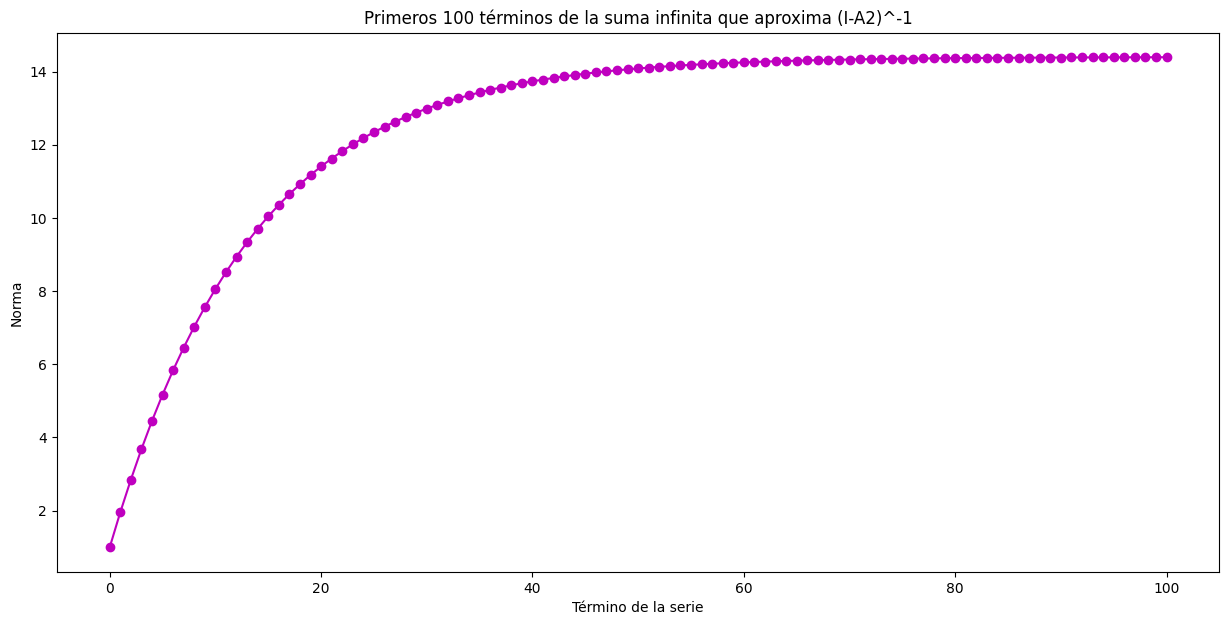

In [ ]:
#Y con n=100

x=np.arange(101)
y=v2_100

fig, ax = plt.subplots()
ax.plot(x, y, color = 'm', marker='o', linestyle='-')
plt.title("Primeros 100 términos de la suma infinita que aproxima (I-A2)^-1")
plt.xlabel("Término de la serie")
plt.ylabel("Norma")
fig.set_figheight(7)
fig.set_figwidth(15)

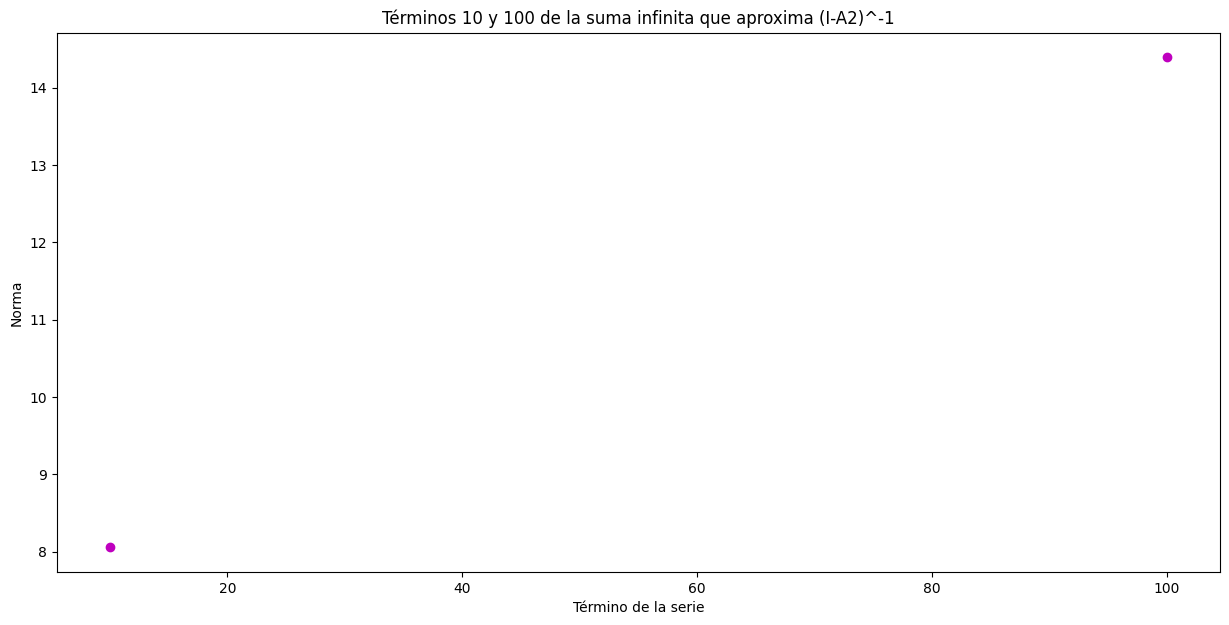

In [ ]:
#graficamos, también, los términos 10 y 100 en particular

x=[10,100]
y=[v2_10[10], v2_100[100]]

fig, ax = plt.subplots()
ax.scatter(x, y, color = 'm')
plt.title("Términos 10 y 100 de la suma infinita que aproxima (I-A2)^-1")
plt.xlabel("Término de la serie")
plt.ylabel("Norma")
fig.set_figheight(7)
fig.set_figwidth(15)

Aquí sí, podemos pensar en una convergencia.

**¿Hay convergencia para ambas matrices? Argumentar la respuesta.**

Observando cómo se comportan las normas de los términos de la sucesión, podemos analizar la convergencia de la serie para ambas matrices.
En la matriz A1 (color verde) observamos que la norma de cada término de la sucesión expresa, prácticamente, un crecimiento lineal. Por lo tanto, es lógico pensar que no habrá convergencia. Mientras tanto, la matriz A2 tiene un crecimiento que parece estabilizarse, y más aún al aumentar la cantidad de términos. Sin embargo, estamos viendo los primeros 100 términos de la sucesión, por lo que no podemos garantizar, al mirar los gráficos, que exista o no un k a partir del cual la serie converja. Propondremos, a continuación, una regla para asegurar la convergencia de la serie infinita.


**¿Podría establecer una regla por la cual se pueda asegurar convergencia de la serie infinita?**

Buscamos una regla que garantice la convergencia de la serie infinita. Es decir, una condición que las matrices deban cumplir para implicar, inmediatamente, la convergencia de la serie infinita. En particular, nos interesa demostrar

$ \rho (A) < 1 \Longleftrightarrow \quad (I − A)^{-1}$ = $I + A + A^{2} + A^{3} +....+ A^{n} \quad $ con $n \rightarrow ∞$

Por información dada en la consigna 1, sabemos que vale la vuelta de la ecuación 5, es decir,

 $\quad (I − A)^{-1}$ = $I + A + A^{2} + A^{3} +....+ A^{n} \quad $ con $n \rightarrow ∞$ $\quad \Longleftrightarrow \quad \displaystyle \lim_{n \to \infty} A^{n+1} = 0$

Si logramos demostrar, entonces,
$ \rho (A) < 1 \Longleftrightarrow \quad \displaystyle \lim_{n \to \infty} A^{n+1} = 0$, quedará probada nuestra regla.

Comenzamos demostrando, para utilizarla luego, la siguiente proposición:

$\rho(A)$ = $\inf\{||A|| : ||.||$ es una norma subordinada$\}$

Demostración:

$\rightarrow)$ $||.||$ es una norma inducida, es decir $$||A||=\max_{||x||\neq 0} \frac{||Ax||}{||x||}$$

En particular, esto vale para $v_\lambda$, el autovector asociado a $\lambda = \rho(A)$. Sabemos que $||v_\lambda||\neq 0$ por ser autovector de $A$. Además, $v_\lambda$ cumple, por definición, $Av_\lambda = \lambda v_\lambda$

Entonces, $||Av_\lambda|| = ||\lambda v_\lambda|| = |\lambda| . ||v_\lambda||$
Como $v_\lambda$ es un caso particular de $||x||\neq 0$, $||A||$ debe cumplir
$$||A||=\max_{||x||\neq 0} \frac{||Ax||}{||x||} \geq \frac{||Av_\lambda||}{||v_\lambda||} = \frac{|\lambda|.||v_\lambda||}{||v_\lambda||} = |\lambda| $$

Luego, $$|\lambda| = \rho(A) \leq ||A||$$

$\leftarrow)$ Citando el apunte *Notas de Álgebra Lineal Computacional* por Gabriel Acosta y Santiago Laplagne, consideramos que podemos utilizar este resultado sin demostrar la vuelta, que parece escapar los contenidos de esta materia:
"*Solo vamos a probar que ρ(A) ≤ ∥A∥ para cualquier norma subordinada. La otra desigualdad es mas complicada y no la probaremos aquí."*  

Veamos, ahora, que $ \rho (A) < 1 \Longleftrightarrow \quad \displaystyle \lim_{n \to \infty} A^{n+1} = 0$

$\leftarrow)$ Por propiedad de autovalores, sabemos que $\rho(A)^k=\rho(A^k)$ $\leq ||A^k|| \rightarrow 0$

Luego, necesariamente, $\rho(A)^k \rightarrow 0$ y esto se cumple $\Longleftrightarrow$ $\rho(A) < 1$

$\rightarrow)$ $ \rho (A) < 1 \rightarrow \exists$ $||A||_*$ norma matricial inducida tal que $ ||A||_* < 1$ por propiedad del ínfimo

(sea $I = \inf(X) \rightarrow \forall$ $\epsilon > 0$ $\exists$ $x$  $\in X / x<I+ \epsilon$) .  
Por desigualdad triangular de la norma,  $||A^{n}||_* \leq ||A||_*^{n}$

Como $ ||A||_* < 1$ , $||A||_*^{n} \rightarrow 0$ cuando $n \rightarrow \infty$

Dado que nos encontramos en dimensión finita, todas las normas son equivalentes, por lo que $||A||^{n} \rightarrow 0$ cuando $n \rightarrow \infty$ para toda norma de $A$.

Por definición de la norma, esto solo se cumple si $A^n \rightarrow 0 $ es decir $ \quad \displaystyle \lim_{n \to \infty} A^{n+1} = 0$

Entonces, $ \rho (A) < 1 \Longleftrightarrow \quad \displaystyle \lim_{n \to \infty} A^{n+1} = 0 \Longleftrightarrow \quad (I − A)^{-1}$ = $I + A + A^{2} + A^{3} +....+ A^{n} \quad $ con $n \rightarrow ∞$ $\quad$

Es decir  $ \rho (A) < 1 \Longleftrightarrow \quad (I − A)^{-1}$ = $I + A + A^{2} + A^{3} +....+ A^{n} \quad $ con $n \rightarrow ∞$ $\quad$

De esta manera, queda demostrada nuestra regla.

**En caso de existir convergencia, grafique el error obtenido como un vector**
$e(n) = ∥(I + A + A^2 + A^3 + . . . + A^n) − (I − A)^{−1}∥_2$

**Nota: calcular $(I − A)^{−1}$ con la función inversaLU desarrollada por el grupo en el TP1.**

Ya estamos, entonces, en condiciones de determinar si existe o no convergencia para las matrices dadas. Observando los autovalores obtenidos en el punto 3 para las matrices A1 y A2, podemos concluir que $\rho(A1) = 1$ y $\rho(A2) < 1$

Por lo tanto, siguiendo nuestra regla y tal como lo permiten intuir los gráficos, para A1 no existe convergencia, mientras que para A2 sí. Graficamos, entonces, el error obtenido como el vector $e(n) = ∥(I + A_2 + A_2^2 + A_2^3 + . . . + A_2^n) − (I − A_2)^{−1}∥_2$

Utilizaremos un procedimiento muy similar al ya utilizado.

In [ ]:
from funciones import inversaLU

In [ ]:
#Comenzamos creando la aproximación L2 (en un principio es la identidad)

L2=np.zeros(A2.shape)

#Creamos A2_i para iterar sobre ella

A2_i=np.eye(A2.shape[0])

#Y los vectores para guardar la norma del error cada término de la serie de potencias

e_10=np.zeros(shape=11)

e_100=np.zeros(shape=101)

#Calculamos (I-A2)^-1

inversa=inversaLU(np.eye(A2.shape[0])-A2)

#Y comenzamos la iteración

for i in range(11):
  #Le sumamos la potencia de A correspondiente, comenzando por I
  L2+=A2_i
  #Guardamos la norma del error en cada término en el vector, para analizar qué ocurre con este
  e_10[i]=scipy.linalg.norm(L2 - inversa, ord = 2)
  e_100[i]=scipy.linalg.norm(L2 - inversa, ord = 2)
  #Aumentamos en 1 la potencia de A, para sumárselo al término siguiente
  A2_i=A2_i@A2

#Continuamos con lo que falta para n=100

for i in range(11, 101):
  #Le sumamos la potencia de A correspondiente, comenzando por A ^10
  L2+=A2_i
  #Guardamos la norma del error en cada término en el vector, para analizar qué ocurre con este
  e_100[i]=scipy.linalg.norm(L2-inversa, ord = 2)
  #Aumentamos en 1 la potencia de A, para sumárselo al término siguiente
  A2_i=A2_i@A2

De esta manera, están listos los vectores e(10) y e(100). A continuación, graficaremos la norma de cada término, para analizar qué ocurre con éste a medida que aumenta n.
Comenzamos con n=10

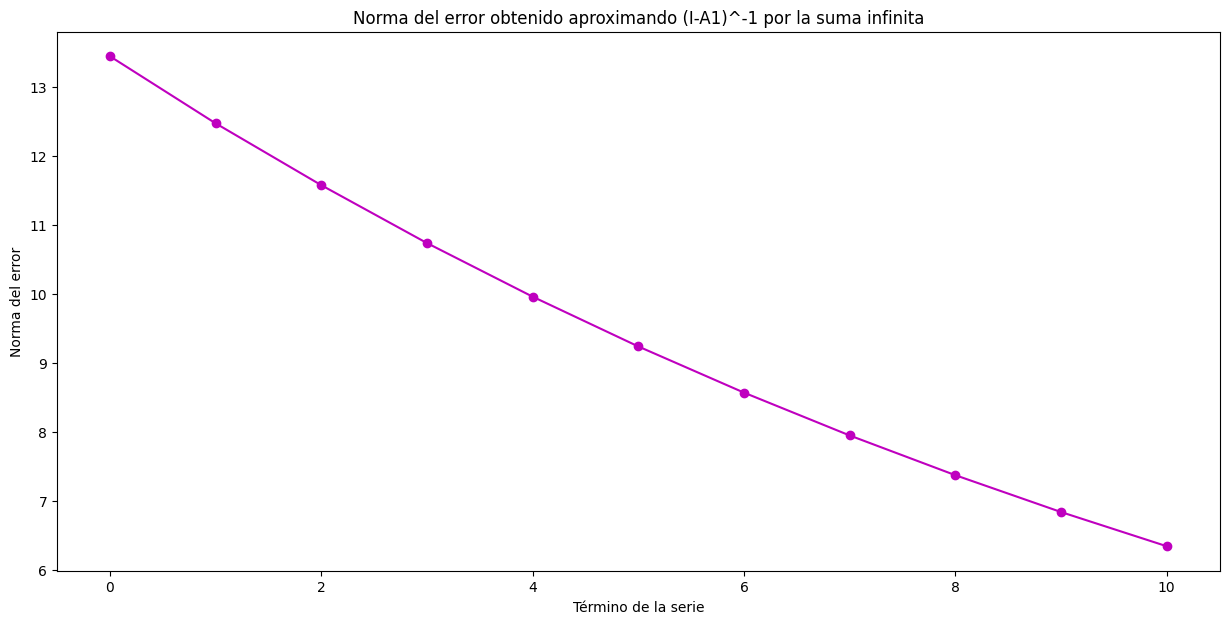

In [ ]:
#Con n=10

x=np.arange(11)
y=e_10

fig, ax = plt.subplots()
ax.plot(x, y, color = 'm', marker='o', linestyle='-')
plt.title("Norma del error obtenido aproximando (I-A1)^-1 por la suma infinita")
plt.xlabel("Término de la serie")
plt.ylabel("Norma del error")
fig.set_figheight(7)
fig.set_figwidth(15)

Podemos observar una clara disminución a medida que aumentan los términos. Observemos, ahora, qué ocurre con n=100

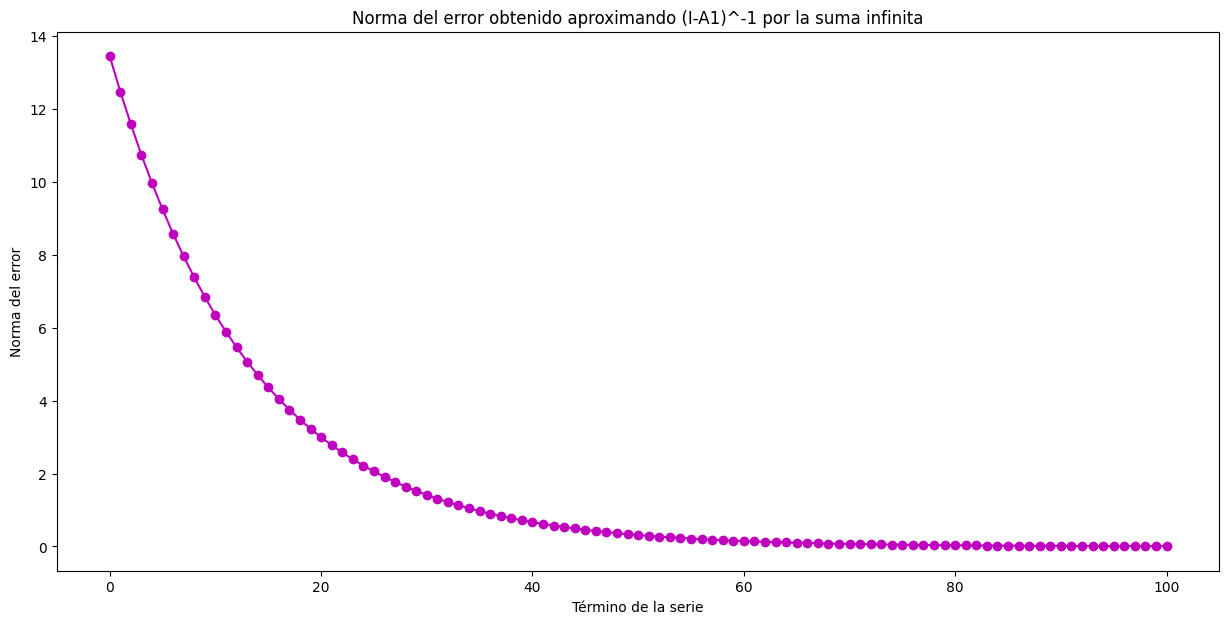

In [ ]:
x=np.arange(101)
y=e_100

fig, ax = plt.subplots()
ax.plot(x, y, color = 'm', marker='o', linestyle='-')
plt.title("Norma del error obtenido aproximando (I-A1)^-1 por la suma infinita")
plt.xlabel("Término de la serie")
plt.ylabel("Norma del error")
fig.set_figheight(7)
fig.set_figwidth(15)

Aquí sí, queda claro que $e \rightarrow 0$ cuando $n \rightarrow \infty$

A partir del término 60, aproximadamente, el error se encuentra prácticamente pegado al 0. Esto confirma, de manera experimental, lo expresado en la afirmación

$\quad (I − A)^{-1}$ = $I + A + A^{2} + A^{3} +....+ A^{n} \quad $ con $n \rightarrow ∞$ $\quad \Longleftrightarrow \quad \displaystyle \lim_{n \to \infty} A^{n+1} = 0$

#Consigna 5

Retomar de las matrices insumo-producto de los paises P1 y P2 asignados en
el TP1, y mediante el método de la potencia, encontrar el autovalor mayor de cada uno de
las $A^{ss}$ y $A^{rr}$. Decidir si existe convergencia de la suma de potencias, a partir del argumento
dado en la Consigna 4 (c).

Importamos las librerias


In [ ]:
!pip install duckdb==1.0.0
!pip install inline-sql

In [ ]:
import pandas as pd
from inline_sql import sql, sql_val
from funciones import metodoPotencia, metodoMonteCarlo

Leemos el excel y separamos nuestros paises

In [ ]:
datos_basicos = pd.read_excel("matrizlatina2011_compressed_0.xlsx", sheet_name= "LAC_IOT_2011")


#Separamos los datos de las filas de nuestros 2 paises
datos_impotantes_rel= sql^ """
                        SELECT *
                        FROM datos_basicos
                        WHERE Country_iso3 LIKE 'CRI%' or Country_iso3 LIKE 'VEN%'
                    """

#Contruimos una tabla auxiliar con todos los datos
#Creamos un dataframe con los paises y los sectores
datos_relacion_iso = pd.concat([datos_impotantes_rel['Country_iso3'], datos_impotantes_rel['Nosector']], axis = 1)
#filtramos los datos de las columnas de relacion con Venezuela
datos_relacion_filtrados = pd.concat([datos_relacion_iso, datos_impotantes_rel.filter(regex="^VEN").copy()], axis = 1)
#filtramos los datos de las columnas de relacion con Costa Rica
datos_relacion= pd.concat([datos_relacion_filtrados, datos_impotantes_rel.filter(regex="^CRI").copy()], axis = 1)
#agregamos los datos del output
datos_relacion = pd.concat([datos_relacion, datos_impotantes_rel['Output']], axis = 1)

Solucion a los $output=0$

In [ ]:
#las columnas que involucran a ambos paises
columnas = pd.concat([datos_relacion.filter(regex="^CRI"), datos_relacion.filter(regex="^VEN")], axis = 1).columns
# Procesamos los datos un poco porque nos encontramos con la dificultad de que los output valian 0 en esas columnas.
# Pero los valores en dichas filas no eran exclusivamente 0. Entonces los igualamos a 0, ya que eran del orden de 10^(-5)

datos_relacion.loc[(datos_relacion['Country_iso3'] == 'VEN') & (datos_relacion['Nosector'] == 's28'), columnas] = 0

datos_relacion.loc[(datos_relacion['Country_iso3'] == 'VEN') & (datos_relacion['Nosector'] == 's31'), columnas] = 0

datos_relacion.loc[(datos_relacion['Country_iso3'] == 'CRI') & (datos_relacion['Nosector'] == 's31'), columnas] = 0

datos_relacion.loc[(datos_relacion['Country_iso3'] == 'CRI') & (datos_relacion['Nosector'] == 's03'), columnas] = 0

Separamos los datos en 4 dataframes

In [ ]:
# Construimos un df con Todos los valores de todos los sectores de ambos paises
numeros_relacion = pd.concat([datos_relacion.filter(regex="^CRI"),  datos_relacion.filter(regex="^VEN")], axis = 1)
#Separamos las filas solo de  Costa Rica
numeros_CRI = sql^ """
                        SELECT *
                        FROM datos_relacion
                        WHERE Country_iso3 LIKE 'CRI%'
                    """
#Datos de Costa Rica vs Costa Rica
numeros_internos_CRI = numeros_CRI.filter(regex="^CRI")
#Datos de Costa Rica vs Venezuela
numeros_externos_CRI = numeros_CRI.filter(regex="^VEN")
#Analogamente con los de Venezuela
numeros_VEN = sql^ """
                        SELECT *
                        FROM datos_relacion
                        WHERE Country_iso3 LIKE 'VEN%'
                    """

numeros_internos_VEN = numeros_VEN.filter(regex="^VEN")

numeros_externos_VEN = numeros_VEN.filter(regex="^CRI")

Pasamos de DataFrame a np.array

In [ ]:
Z_CRICRI = numeros_internos_CRI.to_numpy()

Z_VENVEN = numeros_internos_VEN.to_numpy()


Z_CRIVEN = numeros_externos_CRI.to_numpy()

Z_VENCRI = numeros_externos_VEN.to_numpy()


matirz_Z_grande = numeros_relacion.to_numpy()

- Calcular los coeficientes técnicos para cada bloque en sus submatrices intra-regionales
e inter-regionales de la A total

Conseguimos las Matrices P

In [ ]:
P_VEN=np.zeros([40,40])
#Tomamos las columnas Output
Output_VEN = sql^ """
                        SELECT Output
                        FROM datos_relacion
                        WHERE Country_iso3 LIKE 'VEN%'
                    """

Output_VEN = Output_VEN.to_numpy()

#Construimos P para Venezuela
for fila in range (P_VEN.shape[0]):
    if Output_VEN[fila]==0:
        P_VEN[fila][fila]=1
    else:
        P_VEN[fila][fila]= Output_VEN[fila][0]

#De la misma manera para Costa Rica
P_CRI=np.zeros([40,40])

Output_CRI= sql^ """
                        SELECT Output
                        FROM datos_relacion
                        WHERE Country_iso3 LIKE 'CRI%'
                    """

Output_CRI = Output_CRI.to_numpy()
for fila in range (P_CRI.shape[0]):
    if Output_CRI[fila]==0:
        P_CRI[fila][fila]=1
    else:
        P_CRI[fila][fila]=Output_CRI[fila][0]

In [ ]:
#Tomamos las inversas
P_INV_CRI=inversaLU(P_CRI)
P_INV_VEN=inversaLU(P_VEN)

# Ejercicio 7 Matrices Insumo-Producto
A_VV= Z_VENVEN@P_INV_VEN

A_VC = Z_VENCRI@P_INV_CRI

A_CC= Z_CRICRI@P_INV_CRI

A_CV = Z_CRIVEN@P_INV_VEN


Completamos la A del sistema completo

In [ ]:
A_grande = np.zeros([80,80])

for fila in range(80):
    for columna in range(80):
        if (fila < 40) and (columna < 40):
            A_grande[fila][columna] = A_VV[fila][columna]
        elif (fila < 40):
            A_grande[fila][columna] = A_VC[fila][columna -40]
        elif (fila >= 40) and (columna < 40):
            A_grande[fila][columna] = A_CV[fila -40][columna]
        else:
            A_grande[fila][columna] = A_CC[fila -40][columna -40]

In [ ]:
autovalor_mayor_A_VV = metodoPotencia(A_VV)
autovalor_mayor_A_CC = metodoPotencia(A_CC)

print(autovalor_mayor_A_VV)
print(autovalor_mayor_A_CC)

0.33804212614074713
0.2743360002448782


Entonces, sabiendo que $\rho(A_{VV}) < 1$ y $\rho(A_{CC}) < 1$ y considerando la regla dada en $4c$, podemos asegurar la convergencia de la suma de potencias para ambas matrices.

#Consigna 6

Se define a la matriz $$ E_{n} = I_{n} -\frac{1}{n} e e^{t} $$


Con  el  vector  $e \in \mathbb{R}^{n}$


$$e= \begin{pmatrix}
1 \\
1 \\
... \\
1\\
1
\end{pmatrix}
$$

Entonces
$$E_{n} = \begin{pmatrix}
          1-\frac{1}{n} & -\frac{1}{n} & ... & -\frac{1}{n} & -\frac{1}{n}\\
          -\frac{1}{n} & 1-\frac{1}{n} & -\frac{1}{n} & ... & -\frac{1}{n} \\
          . & . & . & . & . \\
          . & . & . & . & . \\
          . & . & . & . & . \\
          -\frac{1}{n} & -\frac{1}{n} & -\frac{1}{n} & ... & 1-\frac{1}{n}
         \end{pmatrix}
$$
$$ \\ $$
Como se ve la matriz $E_{n} \in \mathbb{R}^{nxn}$ y para cada posicion $i j$ vemos que si: $$ \\ $$
$ i = j$ $\implies$ $(E_{n})_{ij}= 1-\frac{1}{n} $ $$ \\ $$
$i \neq j$ $\implies$ $(E_{n})_{ij}= -\frac{1}{n} $

Con esto en mente podemos resolver las consignas.

a. Veamos que $\forall z \in \mathbb{R}^{n}$, el promedio de las componentes de $E_{n}z$ es igual a 0.
$$ \\ $$
Primero calculemos $E_{n}z$.

$$ E_{n}z=
\begin{pmatrix}
1-\frac{1}{n} & -\frac{1}{n} & ... & -\frac{1}{n} & -\frac{1}{n} \\
-\frac{1}{n} & 1-\frac{1}{n} & -\frac{1}{n} & ... & -\frac{1}{n} \\
. & . & . & . & . \\
. & . & . & . & . \\
. & . & . & . & . \\
-\frac{1}{n} & -\frac{1}{n} & -\frac{1}{n} & ... & 1-\frac{1}{n}
\end{pmatrix}. \begin{pmatrix}
z_1 \\
z_2 \\
z_3 \\
... \\
z_{n-1}\\
z_{n}
\end{pmatrix}
$$
$$ \\ $$
$$
E_{n}z = \begin{pmatrix}
z_1 - \frac{1}{n} (\sum_{i=1}^{n} z_i) \\
z_2 - \frac{1}{n} (\sum_{i=1}^{n} z_i) \\
z_3 - \frac{1}{n} (\sum_{i=1}^{n} z_i) \\
... \\
z_{n-1} - \frac{1}{n} (\sum_{i=1}^{n} z_i) \\
z_{n} - \frac{1}{n} (\sum_{i=1}^{n} z_i)
\end{pmatrix}
$$

$$ \\ $$

Tomando el promedio:

$$
\frac{1}{n}(\sum_{i=1}^{n}( z_i -\frac{1}{n}\sum_{j=1}^{n}z_j))
$$
Separando en 2 sumatorias tenemos:
$$
\frac{1}{n}\sum_{i=1}^{n}z_i -\frac{1}{n}(\frac{1}{n}\sum_{i=1}^{n}\sum_{j=1}^{n}z_j)
$$

Luego notemos $\sum_{i=1}^{n}\sum_{j=1}^{n}z_j= n\sum_{j=1}^{n}z_j$ entonces.
$$
\frac{1}{n}\sum_{i=1}^{n}z_i -\frac{1}{n}(\frac{n}{n}\sum_{j=1}^{n}z_j)=0
$$

Con esto en mente observamos que efecto tiene $E_n$ sobre $A$.
$$E_nA=(E_na_1|E_na_2|...|E_na_n)$$
Como ya probamos $\forall z \in \mathbb{R}^{n}, E_nz$ lo que hace es a cada cordenada del vector z le resta el promedio de las coordendadas del vector entero. Llevando este analisis a la matriz $A$, vemos que $E_n$ toma cada vector columna de $A$, $a_i$  y le resta a cada una de sus coordenadas el promedio de $a_i$.


b. Notemos que por construccion $E_{n}$ por construcción es un proyector ortogonal sobre el espacio $<e>^{\perp}$. Esto lo vamos a probar más adelante en el trabajo. Pero es importante saber que los autovalores de un proyector son el 1 y el 0. $$ \\ $$
$\lambda = 1$
$$
E_n - I_n = I_n -\frac{1}{n} ee^{t} - I_n =-\frac{1}{n}ee^{t}
$$
Como vemos es un producto exterior entre vectores, eso significa que tiene rango 1. Luego la única ecuación linealmente independiente es:
$$-\frac{1}{n}(x_1+x_2+...+x_n)=0$$
Que desarrollando un poco:
$$\frac{1}{n}x_1 =-\frac{1}{n}(x_2+x_3+x_4+...+x_n) $$
$$x_1 =-(x_2+x_3+x_4+...+x_n) $$
Luego el espacio generado por los autovalores asociados a $\lambda=1$ es:
$$ x_2(-1,1,0,...,0)+x_3(-1,0,1,0,...,0)+...+x_n(-1,0,...,1)
$$
Llamamos $d$ al subespacio generado por estos vectores.

Notemos que cada $x_i$ tiene un $-1$ en la primera posición y un $1$ en la posición i, en el resto de posciones tiene 0. En total son $n-1$ vectores linealmente independientes. Ya que todos tienen $1$ en posiciones diferentes.

Ahora veamos que sucede con el otro autovalor.
$$ \\ $$
$\lambda = 0$

$$
E_n - 0I_n = E_n
$$
Como ya mencionamos $E_n$ es un proyector ortogonal sobre el espacio $<e>^{\perp}$ entonces es trivial que $E_ne=0$ y no hay otro autovector además del vector $e$ ya que el otro autovalor ya tenía un espacio asociado de dimensión $n-1$.

Notemos que $E_n$ es una matriz simétrica lo que nos dice que los autovectores asociados a distintos autovalores son perpedinculares entre sí. Entonces tenemos que $e \perp d$ y que $dim(e) + dim(d)=n$ tenemos que $d=<e>^{\perp}$ entonces $<e+d> =\mathbb{R}^{n}$ y como por definición $e  \cap d = \emptyset$ Tenemos que $<e+d>$ es una base de $ \mathbb{R}^{n}$

Ahora si a cada vector de esta base de $ \mathbb{R}^{n}$ lo multiplicamos a izquierdad por $E_n$ obtendremos una base de la imagen y el nucleo.
Si llamamos $d_i$ al i-esimo vector de la base $d$ tenemos que:
$$
  E_nd_i=1d_i=d_i
$$ Ya que son los autovectores asociados al autovalor 1, y como sabemos que es una base tienen que ser la base de la imagen.
Luego si hacemos:
$$
E_ne=0e=0
$$

Ya que e es el autovector de autovalor 0. Obtenemos la base del nucleo de está transformación lineal. $ \\ $

c. Veamos que $E_n$ es un proyector para eso necesitamos ver que $(E_n)^{2}=E_n$. Primero que nada notemos $E_n \in \mathbb{R}^{nxn} \implies (E_n)^{2} \in \mathbb{R}^{nxn}$. Entonces el producto es realizable y pertenecen ambas a la misma dimensión. Probemos ahora la igualdad:

$$
(E_n)_i=(c_1 | c_2 |...|c_n )
$$
Son las columnas de $E_n$.
$$
(E_n)^2=E_n . E_n =(E_n.c_1 |E_n.c_2|...|E_n.c_n)
$$
Veamos ahora que sucede con cada $E_n.c_i$. $$ \\ $$
Definimos ahora $E_n.c_{ij}= $elemento j-esimo del vector $E_n.c_i$

Ahora para que $(E_n)^2$ sea igual a $E_n$ tenemos que ver que: $$ \\ $$

Si $i = j \implies E_n.c_{ij}=1-\frac{1}{n} $ $\wedge$ $i \neq j \implies E_n.c_{ij}=-\frac{1}{n} $

Veamos la primera implicación.
$$E_n.C_{ij}= c^{t}_{i}c_{j}=c^{t}_{i}c_{i}=||c_i||_2^2=(1-\frac{1}{n})^2+\sum_{i=1}^{n-1}\frac{1}{n^2}=1-\frac{2}{n}+\frac{1}{n^2}+\frac{n-1}{n^2}=1-\frac{1}{n}$$

Veamos la segunda implicación.

$$E_n.C_{ij}=c^{t}_{i}c_{j} = -\frac{2}{n}(1-\frac{1}{n})+ \sum_{i=1}^{n-2}\frac{1}{n^2}=-\frac{2}{n}+\frac{2}{n^2}+\frac{n-2}{n^2}=-\frac{1}{n} $$

Luego $(E_n)^2=E_n$ entonces es un proyector y como antes mencionamos que $d \perp e$, pero mostramos que $e=Nu(E_n)$ y $d=Im(E_n)$ entonces  es un proyector ortogonal. Luego como ya mencionamos que por construcción vemos que proyecta sobre $<e>^\perp$. Además esto se ve en que los vectores que van al 0 en un proyector ortogonal son los vectores perpendiculares al subespacio donde ese proyector proyecta a todos los vectores de $\mathbb{R}^{n}$.

d.
i) $E_n$ es una matriz ortogonal $\iff $ $\forall v \in \mathbb{R}^{n}, ||E_nv||=||v||$ $$ \\ $$

Pero si tomamos $v=e$. $||E_ne||=0\neq||e||$ ya que $e \neq 0$, luego  $E_n$ no es ortogonal.

ii) $E_n$ es singular $\iff$ si $\exists v\in\mathbb{R}^{n}, v\neq 0 $ / $ E_nv=0$. Si tomamos $v=e$ tenemos que $E_ne=0$ y recodemos que $e$ es un vector donde todos sus componentes son 1. Por lo tanto es singular.

iii) $E_n$ es definida positiva $\iff$  $\forall v \in \mathbb{R}^{n}, v\neq0 \implies v^{t}E_nv>0$
Pero si tomamos $v=e$ Tenemos que:

$$e^{t}E_ne= e^{t}.
\begin{pmatrix}
0 \\
0 \\
... \\
0
\end{pmatrix} = 0 > 0
$$
Por lo tanto $E_n$ no es definida positiva.

iv) $traza(E_n)=n-1$  Recordemos como caracterizamos a la matriz $E_n$, en la posiciones $i,j$ tal que $ i = j$ $\implies$ $(E_{n})_{ij}= 1-\frac{1}{n} $ $$ \\ $$
Y la traza por definición es la suma de los elementos de la diagonal.

$$traza(E_n)=\sum_{i=1}^{n} 1-\frac{1}{n}= n-\frac{n}{n}=n-1$$
Luego iv) es verdadera.

# Consigna 7
Análisis en Componentes Principales (ACP) por el método de la potencia.
Calcular la matriz de covarianzas C del país P1 a partir de las matriz $A_{rr}$ desde el Excel de CEPAL. Para ello se debe:

* Normalizar la matriz de coeficientes $A_{rr}$ de la forma:
$\bar{A_{rr}} = E_{40} A_{rr}$

In [ ]:
#Arr, la matriz de coeficientes técnicos de P1 es, en nuestro caso, A_VV
e_40=np.ones((40,1))
e_40_t=np.transpose(e_40)
E_40=np.eye(40)-((1/40)*(e_40@e_40_t))
#Llamaremos a la matriz normalizada A_VV_
A_VV_=E_40@A_VV

* Calcular la matriz de covarianzas como:

  $ C = \bar{A_{rr}}^t \bar{A_{rr}} / (40-1)$

In [ ]:
A_VV_T_=np.transpose(A_VV_)
C=(A_VV_T_@A_VV_)/39

Encontrar los 2 primeros autovectores usando el método de la potencia de la forma siguiente. Algoritmo (Deflación de Hotelling):

* Inicialmente multiplicar un vector aleatorio x0 de norma 1 a C y luego continuar iterando utilizando la siguiente regla:

  $x_1 = Cx_0$

  $x_{k+1} = Cx_k$

  para encontrar el primer autovector (con máximo autovalor).

* En cada paso se debe volver a normalizar el siguiente $x_k$.

* Continuar mientras $∥x^t_{k+1} −x_k∥_2 > (1−ϵ)$, que es el criterio de parada para el algoritmo iterativo, con ϵ > 0. **Nota:** asumimos  $∥x_{k+1} −x_k∥_2 > (1−ϵ)$, dado que de otra manera no es posible realizar la resta entre vectores.

* Devolver x_{k+1} que es la aproximación al autovector buscado v1.

In [ ]:
a_0=np.random.rand(40, 1)
x0=a_0/np.linalg.norm(a_0, ord = 2)
xk=x0
a_mas_1=C@x0
xk_mas_1=a_mas_1/np.linalg.norm(a_mas_1, ord = 2)
epsilon= 1-1e-6 #tomamos este epsilon>0
while np.linalg.norm(xk_mas_1-xk, ord = 2)>1-epsilon:
  xk=xk_mas_1
  a_mas_1=C@xk
  xk_mas_1=a_mas_1/np.linalg.norm(a_mas_1, ord = 2)

#Al terminar la iteración, xk_mas_1 es la aproximación del vector buscado V1

* Obtenemos, a partir del coeficiente de Rayleigh $λ_1 = \frac{v^t_1 C v_1}{v^t_1 v_1}$

* Se procede recursivamente y se calcula la nueva matriz C′ sobre la cual se va a iterar nuevamente:

  $C′ = C − λ_1v_1v^t_1$

  para encontrar el siguiente autovector v2 y luego λ2.

In [ ]:
#A continuación, buscamos obtener lambda1

v1=xk_mas_1
v1_t=np.transpose(v1)

lambda1=(v1_t@C@v1)/(v1_t@v1)

print(lambda1)

#calculamos c'

C_prima=C - lambda1*(v1@v1_t)

#A Luego, iteramos sobre C_prima para obtener v2 y lambda2

[[0.01304237]]


In [ ]:
a_0_prima=np.random.rand(40, 1)
x0_prima=a_0_prima/np.linalg.norm(a_0_prima, ord = 2)
xk_prima=x0_prima
a_mas_1_prima=C_prima@x0_prima
xk_mas_1_prima=a_mas_1_prima/np.linalg.norm(a_mas_1_prima, ord = 2)
epsilon= 0.99999 #tomamos este epsilon>0
while np.linalg.norm(xk_mas_1_prima-xk_prima, ord = 2)>1-epsilon:
  xk_prima=xk_mas_1_prima
  a_mas_1_prima=C_prima@xk_prima
  xk_mas_1_prima=a_mas_1_prima/np.linalg.norm(a_mas_1_prima, ord = 2)

#Al terminar la iteración, xk_mas_1_prima es la proximación del vector buscado v2

In [ ]:
#A continuación, buscamos obtener lambda2

v2=xk_mas_1_prima
v2_t=np.transpose(v2)

lambda2=(v2_t@C@v2)/(v2_t@v2)

print(lambda2)

[[0.00768733]]


# Consigna 8

Utilizando los dos autovectores del Análisis en Componentes Principales de
la consigna 7, proyectar las filas de $A_{rr}$ en un scatter de 2 dimensiones. En este scatter identificar visualmente al menos dos clusters de 3 o más sectores que se encuentren a una distancia euclideana baja. Nota: En el caso de que el país P1 asignado al grupo no tenga suficiente información pertinente para encontrar los clusters, probar con el país asignado P2.


Vamos a utilizar los autovectores de $\bar{A}_{rr}^t\bar{A}_{rr}$ obtenido en el ejercicio anterior para reducir la dimension de la matriz $A_{rr}$ a un espacio de dimension 2 a través del analisis de componentes principales. $$ \\ $$
Entonces creamos nuestra matriz reductora tomando como columna los 2 autovectores principales de la matriz $\bar{A}_{rr}^t$$\bar{A}_{rr}$. Luego proyectamos la matriz $\bar{A}_{rr}$ sobre nuestra matriz reductora y graficamos las columnas de la matriz resultado. Estas son las coordenadas de los sectores de A en  $<v_1,v_2>$ con $v_1 , v_2$ los autovectores de mayor varianza de $\bar{A}_{rr}^t\bar{A}_{rr}$. Notemos que $\bar{A}_{rr}^t\bar{A}_{rr}$ es una matriz simitrica lo que implica que $v_1 \perp v_2$ ya que provienen de autovalores distintos y como estaban normalizados, la proyeccion sobre este subespacio para un vector $x$ es:
$$ Mx=<v1,x>v1+<v2,x>v2$$
Esto es lo que vemos en el siguiente gráfico.

<ipython-input-48-2ec7325ec800>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  matriz_reducturora[filas][columnas]=v1[filas] #la primera columna es v1
<ipython-input-48-2ec7325ec800>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  matriz_reducturora[filas][columnas]=v2[filas] # la segunda columna es v2


Text(0, 0.5, 'Segundo autovector principal')

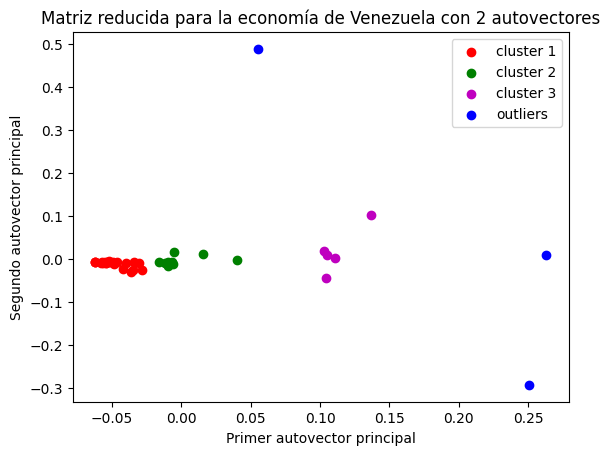

In [ ]:
#Fijamos v1 y v2 ya que los clusters los buscamos a mano, y las pequeñas variaciones en los valores nos alteran los clusters
#Los valores elegidos han sido obtenidos al aplicar el algoritmo del ejercicio 7

v1=np.array([[0.12473114],[0.0543692 ],[0.01327219],[0.13960633],[0.27990877],[0.13197617],[0.19071196],[0.16458097],[0.07419927],[0.08879064],[0.15019595],[0.16652086],[0.11524741],[0.09269384],[0.13859927],[0.04954592],[0.25125083],[0.13367068],[0.17467828],[0.15387052],[0.17948462],[0.20136824],[0.32607143],[0.11040186],[0.26432648],[0.1433076 ],[0.15655987],[0.        ],[0.20162861],[0.07334316],[0.        ],[0.16271999],[0.09844769],[0.18393372],[0.05021368],[0.18377463],[0.19655366],[0.17258952],[0.12641933],[0.13142636]])
v2=np.array([[-7.01554885e-02],[ 1.23412961e-02],[ 5.05123590e-02],[ 4.49933774e-02],[-2.98118176e-01],[-1.15685992e-01],[-1.73332931e-01],[-1.29155383e-01],[-5.92705660e-03],[-3.21118135e-02],[-1.57035231e-03],[ 6.47417387e-03],[-3.11915348e-03],[-1.50191785e-02],[ 6.99717376e-04],[ 6.92063533e-01],[ 1.48930024e-01],[ 6.06717272e-04],[ 6.20794982e-03],[-1.10401655e-03],[ 5.80171309e-02],[ 1.07705597e-01],[-9.08633836e-02],[-1.67140650e-03],[ 6.79421711e-03],[-5.08486655e-02],[-3.71777616e-02],[ 0.00000000e+00],[ 2.21353276e-02],[ 1.36942069e-03],[ 0.00000000e+00],[-2.84943289e-02],[-8.97014817e-05],[ 5.55936362e-01],[ 8.08344534e-03],[ 3.32513772e-02],[ 1.51580521e-03],[ 4.87091284e-03],[ 6.48793802e-03],[-8.36555810e-04]])

matriz_reducturora=np.zeros([len(v1),2]) #inicializamos nuestra matriz reductoras
for columnas in range(2):
  for filas in range(len(v1)):
    if columnas==0:
      matriz_reducturora[filas][columnas]=v1[filas] #la primera columna es v1
    else:
      matriz_reducturora[filas][columnas]=v2[filas] # la segunda columna es v2

AVV_2=A_VV_@matriz_reducturora #hacemos la proyeccion
x=list(AVV_2[:,0])
y=list(AVV_2[:,1])
#inicializamos las listas que van a formar los cluster y el resto de puntos
cluster1_x=[]
cluster1_y=[]
cluster2_x=[]
cluster2_y=[]
cluster3_x=[]
cluster3_y=[]
restox=[]
restoy=[]
#agrupamos cada punto en su respectivo cluster
for i in range(len(y)):
  if x[i]<-0.025:
    cluster1_y.append(y[i])
    cluster1_x.append(x[i])

  elif x[i]>=-0.025 and x[i]<0.05:
    cluster2_x.append(x[i])
    cluster2_y.append(y[i])
  elif x[i]>=0.08 and x[i]<0.17:
    cluster3_x.append(x[i])
    cluster3_y.append(y[i])

  else:
    restox.append(x[i])
    restoy.append(y[i])
#Hacemos el grafico, separando en 2 clusters y outliers
fig, ax = plt.subplots()
scatter=ax.scatter(cluster1_x,cluster1_y, color="r",label="cluster 1")
scatter=ax.scatter(cluster2_x,cluster2_y, color="g",label="cluster 2")
scatter=ax.scatter(cluster3_x,cluster3_y, color="m",label="cluster 3")
scatter=ax.scatter(restox,restoy, color="b", label="outliers")
ax.legend()
ax.set_title("Matriz reducida para la economía de Venezuela con 2 autovectores")
plt.xlabel("Primer autovector principal")
plt.ylabel("Segundo autovector principal")

Tomamos la decisión de fijar los autovectores que calculamos para la matriz $A_{VV}$ con el objetivo de mostrar los mismos gráficos que analizamos mientras realizamos el informe, debido a que los clusters están tomados a mano y cualquier variación en los autovectores va derivar en una variación en la proyección que modificaría los gráficos. Los vectores tomados son resultado de aplicar el algoritmo detallado en el punto 7.

Decidimos que estos iban a hacer los cluster por la cercania de sus coordenas en norma 2. Consideramos que los puntos azules son outliers, no están a distancia euclídea baja de ningún punto.

# Consigna 9

En este caso utilizaremos la matriz H que representa la matriz input-output
integrada verticalmente. Esta matriz se define mediante la ecuación $$H=A(I-A)^{-1}$$
Se dice que esta matriz tiene la particularidad de reforzar las relaciones entre los sectores que de ya por si tienen una alta relevancia en A. Encontrar cuál es la relación de H con la suma de potencias.

Sabemos que $$H=A(I-A)^{-1}$$

Si la matriz $A$ es tal que la serie $I + A + A^{2} + A^{3} +....+ A^{n}$ converge, entonces

$\quad (I − A)^{-1}$ = $I + A + A^{2} + A^{3} +....+ A^{n} \quad $ con $n \rightarrow ∞$

Reemplazando esto en la definición de la matriz $H$,

$H=A(I-A)^{-1} =$ $A(I + A + A^{2} + A^{3} +....+ A^{n})$ $= A + A^{2} + A^{3} +....+ A^{n} + A^{n+1}$

Luego, tomando $n \rightarrow ∞$, es equivalente a

$A + A^{2} + A^{3} +....+ A^{n}$ con $n \rightarrow ∞$

Luego, si la serie infinita converge, la matriz H es la suma infinita

$A + A^{2} + A^{3} +....+ A^{n}$ con $n \rightarrow ∞$

Prácticamente igual a la anterior, pero sin la identidad.

#Consigna 10

Repetir el análisis en Componentes Principales para las matrices H, sepa-
rando en clusters y analizando los sectores agrupados.

Calculamos $H$ y la pasamos a $\bar{H}$ para luego calcular $\bar{H}^{t}$ y la matriz $C$

In [ ]:
#Preparamos la matrices H barra y H brarra transpuesta
I=np.eye(40)
H=A_VV@inversaLU(I-A_VV)
H=E_40@H
H_T=np.transpose(H)
C_H=H_T@H/39

Luego aplicamos el mismo algoritmo que en el ejercicio 7

In [ ]:
a_0_h=np.random.rand(40, 1)
x0_h=a_0_h/np.linalg.norm(a_0_h, ord = 2)
xk_h=x0_h
a_mas_1_h=C_H@x0_h
xk_mas_1_h=a_mas_1_h/np.linalg.norm(a_mas_1_h, ord = 2)
epsilon= 1-1e-6 #tomamos este epsilon>0
while np.linalg.norm(xk_mas_1_h-xk_h, ord = 2)>1-epsilon:
  xk_h=xk_mas_1_h
  a_mas_1_h=C_H@xk_h
  xk_mas_1_h=a_mas_1_h/np.linalg.norm(a_mas_1_h, ord = 2)

#Al terminar la iteración, xk_mas_1_h es la aproximación del vector buscado V1

In [ ]:
#A continuación, buscamos obtener lambda1

v1_h=xk_mas_1_h
v1_h_t=np.transpose(v1_h)

lambda1_h=(v1_h_t@C_H@v1_h)/(v1_h_t@v1_h)

print(lambda1_h)

#calculamos c'

C_H_prima=C_H - lambda1_h*(v1_h@v1_h_t)

#A Luego, iteramos sobre C_H_prima para obtener v2_h y lambda2_h

[[0.02267]]


In [ ]:
a_0_h_prima=np.random.rand(40, 1)
x0_h_prima=a_0_h_prima/np.linalg.norm(a_0_h_prima, ord = 2)
xk_h_prima=x0_h_prima
a_mas_1_h_prima=C_H_prima@x0_h_prima
xk_mas_1_h_prima=a_mas_1_h_prima/np.linalg.norm(a_mas_1_h_prima, ord = 2)
epsilon= 1-1e-6 #tomamos este epsilon>0
while np.linalg.norm(xk_mas_1_h_prima-xk_h_prima, ord = 2)>1-epsilon:
  xk_h_prima=xk_mas_1_h_prima
  a_mas_1_h_prima=C_H_prima@xk_h_prima
  xk_mas_1_h_prima=a_mas_1_h_prima/np.linalg.norm(a_mas_1_h_prima, ord = 2)

#Al terminar la iteración, xk_mas_1_h_prima es la proximación del vector buscado v2

In [ ]:
#A continuación, buscamos obtener lambda2

v2_h=xk_mas_1_h_prima
v2_h_t=np.transpose(v2_h)

lambda2_h=(v2_h_t@C_H@v2_h)/(v2_h_t@v2_h)

print(lambda2_h)

[[0.01651465]]


Ahora hacemos el analisis  de coeficientes principales

<ipython-input-54-6f67fc6bb1bb>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  matriz_reducturora_H[filas][columnas]=v1_h[filas] #la primer columna es el autovector principal
<ipython-input-54-6f67fc6bb1bb>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  matriz_reducturora_H[filas][columnas]=v2_h[filas] #la segunda columna es el segundo autovector principal


Text(0, 0.5, 'Segundo autovector principal')

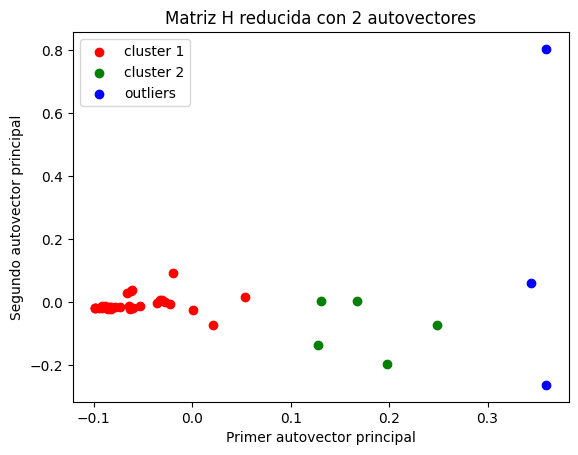

In [ ]:
#Fijamos los autovectores ya que los clusters los buscamos a mano las pequeñas variaciones en los valores nos alteran los clusters
#v1_h y #v2_h son valores obtenidos aplicando el algoritmo anterior
v1_h=np.array([[0.12972009],[0.0596784 ],[0.02413643],[0.11514344],[0.29482196],[0.15377712],[0.205109  ],[0.18079526],[0.08921528],[0.07307036],[0.10878029],[0.11316666],[0.09183673],[0.08869753],[0.09683382],[0.25309171],[0.30182238],[0.14187834],[0.11988845],[0.16510665],[0.16380103],[0.25144942],[0.31319373],[0.11971977],[0.17362234],[0.13437258],[0.14981458],[0.        ],[0.20067582],[0.06866793],[0.        ],[0.12979419],[0.0780013 ],[0.31595545],[0.06692513],[0.13739279],[0.10589691],[0.1040603 ],[0.07111924],[0.09267209]])
v2_h=np.array([[ 1.73858551e-01],[ 6.09681255e-04],[-1.72583277e-02],[-4.24242809e-02],[ 6.33744176e-01],[ 2.78423736e-01],[ 3.72276729e-01],[ 3.02621481e-01],[ 6.69199846e-02],[ 7.43251473e-02],[ 3.13335904e-02],[ 2.52580443e-02],[ 2.90781132e-02],[ 4.45933285e-02],[ 2.28606879e-02],[-2.60752804e-01],[-9.62230986e-02],[ 2.16384481e-02],[ 2.76257518e-02],[ 1.26141001e-02],[-5.57351480e-02],[-1.81477927e-01],[-2.40187143e-01],[-3.94255694e-02],[ 1.06934723e-02],[-5.09678507e-02],[-6.13176873e-02],[ 0.00000000e+00],[-4.39843509e-02],[-5.81954870e-04],[ 0.00000000e+00],[-1.40651616e-02],[ 2.28776780e-02],[-2.32323334e-01],[-2.06034128e-02],[-1.70680556e-02],[ 4.08509175e-02],[ 3.65101232e-02],[ 1.96171612e-02],[ 4.73708916e-02]])

matriz_reducturora_H=np.zeros([len(v1_h),2]) #inicializamos la matriz reductora
for columnas in range(2):
  for filas in range(len(v1_h)):
    if columnas==0:
      matriz_reducturora_H[filas][columnas]=v1_h[filas] #la primer columna es el autovector principal
    else:
      matriz_reducturora_H[filas][columnas]=v2_h[filas] #la segunda columna es el segundo autovector principal
H_2=(E_40@H)@matriz_reducturora_H #Centramos y hacemos la proyeccion

Hx=list(H_2[:,0])
Hy=list(H_2[:,1])
#inicializamos los cluster y la lista donde van a ir los puntos
cluster1_Hx=[]
cluster1_Hy=[]
cluster2_Hx=[]
cluster2_Hy=[]
restoHx=[]
restoHy=[]
#rellenamos los clusters
for i in range(len(y)):
  if Hx[i]<0.076:
    cluster1_Hy.append(Hy[i])
    cluster1_Hx.append(Hx[i])
  elif(Hx[i]>=0.1 and Hx[i]<0.27):
    cluster2_Hx.append(Hx[i])
    cluster2_Hy.append(Hy[i])
  else:
    restoHx.append(Hx[i])
    restoHy.append(Hy[i])

#hacemos el grafico
fig, ax = plt.subplots()
ax.scatter(cluster1_Hx,cluster1_Hy, color="r",label="cluster 1")
ax.scatter(cluster2_Hx,cluster2_Hy, color="g",label="cluster 2")
ax.scatter(restoHx,restoHy, color="b", label="outliers")
ax.legend()
ax.set_title("Matriz H reducida con 2 autovectores")
plt.xlabel("Primer autovector principal")
plt.ylabel("Segundo autovector principal")


Tomamos la decisión de fijar los autovalores que calculamos para la matriz $H$ con el objetivo de mostrar los mismos gráficos que analizamos mientras realizamos el informe, debido a que los clusters están tomados a mano y cualquier variación en los autovectores va derivar en una variación en la proyección que modificaría los gráficos.

Sabiendo que la matriz $H$ refuerza la relación entre sectores muy relacionados en la matriz $A$, podemos pensar que los clusters respresentan sectores altamente relacionados y similares entre sí, que no mantienen esa misma relación con los sectores por fuera del mismo.

Veamos que sucede en el interior de cada cluster.

In [ ]:
#hacemos la lista de que sector pertenece a cada cluster
sectores_cluster_1=[Hx.index(xs) for xs in cluster1_Hx]
sectores_cluster_2=[Hx.index(xs) for xs in cluster2_Hx]
outlier=[Hx.index(xs) for xs in restoHx]
#lista con todos los sectores
sectores=["Agricultura y forestal","Caza y pesca","Minería (energía)","Minería (no energía)","Carne y derivados","Molinería, panadería y pastas","Azúcar y productos de confitería","Otros productos alimenticios","Bebidas","Productos de tabaco","Textiles","Confecciones","Calzado","Madera y productos de madera y corcho","Pulpa de madera, papel, imprentas y editoriales","Coque, petróleo refinado y combustible nuclear","Productos químicos básicos","Otros productos químicos (excluye farmacéuticos)","Productos farmacéuticos","Productos de caucho y plástico","Productos minerales no metálicos","Hierro y acero","Metales no ferrosos","Productos fabricados de metal (excepto maquinarias y equipos)","Maquinarias y equipos (excluye maquinaria eléctrica)","Equipos de oficina (incluye equipo computacional)","Maquinarias y aparatos eléctricos","Radio, televisión y equipos de telecomunicaciones","Equipo médico e instrumentos ópticos y de precisión","Vehículos de motor, remolques y semirremolques","Aeronaves y naves espaciales","Otro equipo de transporte","Otras industrias manufactureras n.c.p.","reciclaje (incluye muebles)","Electricidad y gas","Construcción","Transporte","Correo y telecomunicaciones","Finanzas y seguros","Servicios a empresas de todo tipo","Otros servicios"]
#diccionario que une numero del sector con su nombre
dict_sectores=dict(zip(range(0,40),sectores))
for i in range(len(sectores_cluster_1)):
  sectores_cluster_1[i]=dict_sectores[sectores_cluster_1[i]]

for j in range(len(sectores_cluster_2)):
  sectores_cluster_2[j]=dict_sectores[sectores_cluster_2[j]]

for k in range(len(outlier)):
  outlier[k]=dict_sectores[outlier[k]]

print(sectores_cluster_2)

['Minería (no energía)', 'Coque, petróleo refinado y combustible nuclear', 'Productos químicos básicos', 'Metales no ferrosos', 'Finanzas y seguros']


Para el cluster 2 encontramos una relación entre los sectores de la economía que lo conforman. Identificamos mayoritariamente servicios relacionados al área extractiva de recursos no renovables.

Veamos los coeficientes principales de cada sector adentro de los cluster. Como son clusteres grandes,  vamos a considerar 3 sectores como una muestra.

Text(0, 0.5, 'Producción')

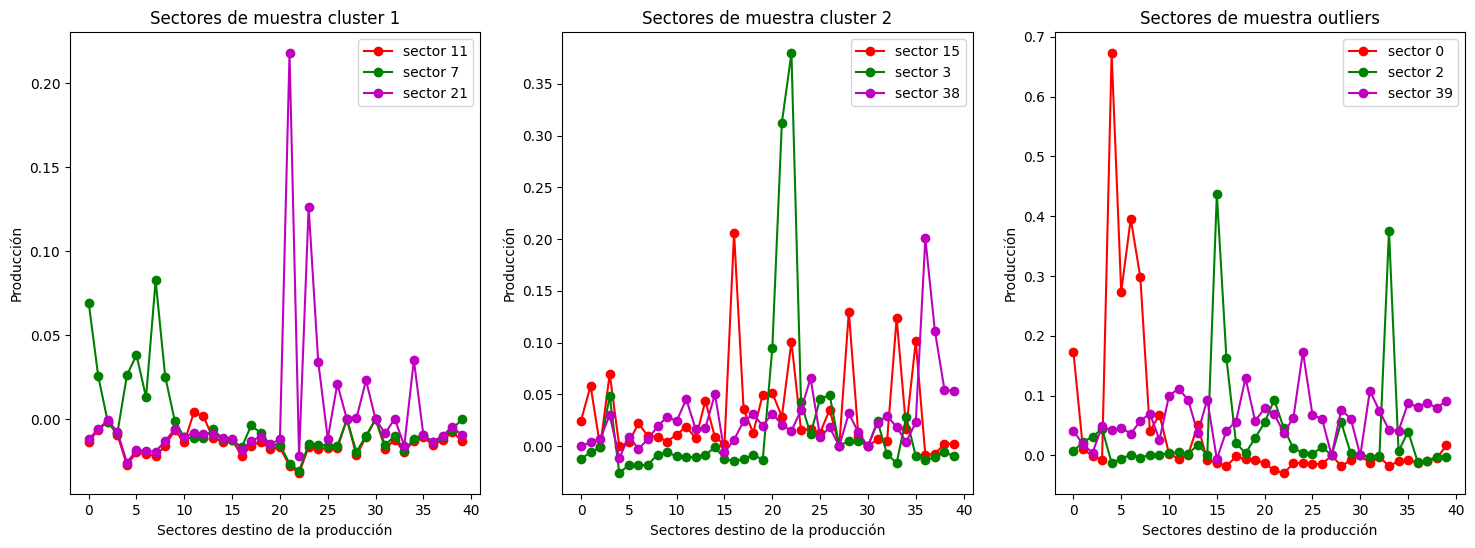

In [ ]:
#tomamos 3 sectores al azar de cada cluster
muestra_cluster_1= [11,7,21]
muestra_cluster_2= [15,3,38]
muestra_outliers= [0,2,39]
numero_sectores=range(0,40)
colores=["red","green","m"]
fig, ax=plt.subplots(nrows=1, ncols=3,figsize=(18,6))
#codigo para el primer grafico
for i in range(3):
  ax[0].plot(numero_sectores,H[muestra_cluster_1[i]],marker="o",color=colores[i],label=f"sector {muestra_cluster_1[i]}")
ax[0].set_title("Sectores de muestra cluster 1")
ax[0].legend()
ax[0].set_xlabel("Sectores destino de la producción")
ax[0].set_ylabel("Producción")
#Codigo para el segundo grafico
for i in range(3):
  ax[1].plot(numero_sectores,H[muestra_cluster_2[i]],marker="o",color=colores[i],label=f"sector {muestra_cluster_2[i]}")
ax[1].set_title("Sectores de muestra cluster 2")
ax[1].legend()
ax[1].set_xlabel("Sectores destino de la producción")
ax[1].set_ylabel("Producción")
#Codigo para el tercer grafico
for i in range(3):
  ax[2].plot(numero_sectores,H[muestra_outliers[i]],marker="o",color=colores[i],label=f"sector {muestra_outliers[i]}")
ax[2].set_title("Sectores de muestra outliers")
ax[2].legend()
ax[2].set_xlabel("Sectores destino de la producción")
ax[2].set_ylabel("Producción")

En estos gráficos podemos observar que pasa adentro de los 2 clusters y dentro de los outliers a nivel de los coeficientes tecnicos. Podemos ver que dentro de los clusters hay mucha superposición de las 3 curvas. Sobre todo en el cluster 1 que es donde las distancias entre los puntos eran menores que las del cluster 2. Aunque en el cluster 2 se sigue apreciando una considereable superposición y mucha cercanía entre los coeficientes técnicos de los distintos sectores.
En el caso de los outliers se puede apreciar más picos en las curvas y menor superposicion apartir de los sectores mayores a 10.

Creemos que la razón de la cercanía entre los puntos en los distintos clusters es la cercanía entre sus coeficientes técnicos de cada sector.


#Consigna 11

Vamos a analizar el perfil de producción para sectores bien diferenciados.
Para ello,

* En el espacio de ACP en 2 dimensiones, calcular las distancias al origen de coordenadas de cada punto.

* Identificar el sector más lejano y el más cercano al origen.

Calculamos la norma de cada punto, es decir la distancia al origen, y luego buscamos los indices de los puntos con mínima y máxima norma que nos dicen sus sectores.

In [ ]:
#obtenemos la distancia al origen de las filas de cada matriz
distancias_origen_AVV=[np.linalg.norm(x, ord=2) for x in A_VV]
distancias_origen_H=[np.linalg.norm(x, ord=2) for x in H]
#buscamos el mínimo y máximo
#excluimos las filas de 0s para obtener un análisis más representativo
AVV_min=min([x for x in distancias_origen_AVV if x>0.])
AVV_max=max(distancias_origen_AVV)
H_min=min(distancias_origen_H)
H_max=max(distancias_origen_H)

#obtenemos el número de sector que representa cada uno (el índice)

sector_H_cercano=distancias_origen_H.index(H_min)
sector_H_lejano=distancias_origen_H.index(H_max)

sector_AVV_cercano=distancias_origen_AVV.index(AVV_min)
sector_AVV_lejano=distancias_origen_AVV.index(AVV_max)

print(sector_H_cercano, sector_H_lejano, sector_AVV_cercano, sector_AVV_lejano)

35 0 9 0


Observemos que, a pesar de que el sector más lejano es el mismo para $A_{VV}$ y $H$, esto no ocurre con el sector más cercano: para $A_{VV}$ es el sector 35, y para $H$ es el sector 9. Observamos la relación entre los coeficientes técnicos de ambos sectores

In [ ]:
print(A_VV[sector_H_cercano])

print(A_VV[sector_AVV_cercano])

[0.00548033 0.00497171 0.00057161 0.00500782 0.00685393 0.00504066
 0.00850219 0.00820615 0.00480431 0.0025076  0.0075883  0.0106478
 0.00828964 0.01402513 0.01340127 0.00109569 0.00852888 0.01292525
 0.01178064 0.0118046  0.01409006 0.01300454 0.00731427 0.01217166
 0.01628335 0.01359036 0.00981771 0.         0.01667671 0.02029385
 0.         0.01809009 0.01099674 0.00609038 0.00994569 0.00807234
 0.00437766 0.00468566 0.00822099 0.00743452]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00020956]


A pesar de que los números no son iguales, considerando que estamos hablando de millones de dólares, podemos concluir que son coeficientes igualmente pequeños. Luego ahondaremos en estas conclusiones.

Text(0.5, 1.0, 'Producción de los sectores más lejanos al origen')

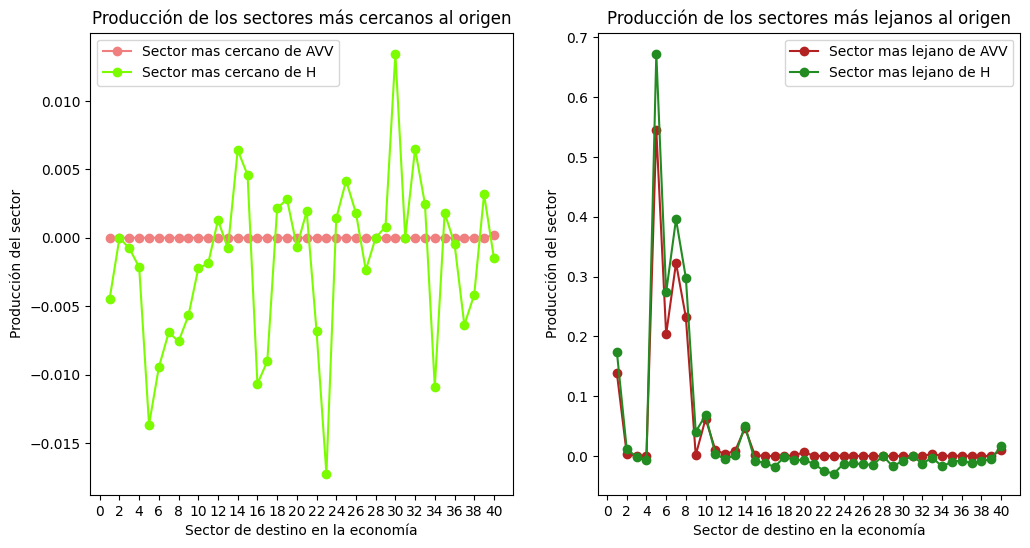

In [ ]:
#Obtenemos los valores de cada matriz para el sector más cercano y más lejano al origen
produccion_H_cercano=H[sector_H_cercano]
produccion_H_lejano=H[sector_H_lejano]
produccion_AVV_cercano=A_VV[sector_AVV_cercano]
produccion_AVV_lejano=A_VV[sector_AVV_lejano]

#Graficamos para comparar los comportamientos

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12,6))
ax[0].plot(range(1,41), produccion_AVV_cercano,color="lightcoral",marker="o",label="Sector mas cercano de AVV")
ax[1].plot(range(1,41), produccion_AVV_lejano,color="firebrick",marker="o",label="Sector mas lejano de AVV")
ax[0].plot(range(1,41), produccion_H_cercano,color="lawngreen",marker="o",label="Sector mas cercano de H")
ax[1].plot(range(1,41), produccion_H_lejano,color="forestgreen",marker="o",label="Sector mas lejano de H")
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel("Sector de destino en la economía")
ax[1].set_xlabel("Sector de destino en la economía")
ax[0].set_ylabel("Producción del sector")
ax[1].set_ylabel("Producción del sector")
ax[0].set_xticks(range(0,41,2))
ax[1].set_xticks(range(0,41,2))
ax[0].set_title("Producción de los sectores más cercanos al origen")
ax[1].set_title("Producción de los sectores más lejanos al origen")

En primer lugar, en el segundo gráfico, podemos observar que ambas curvas presentan un perfil similar. Esto se debe a que el sector es el mismo (sector 0), pero la principal diferencia radica en que la curva del sector en la matriz H esta más estirada con respecto a aquella en la $A_{VV}$. Esto responde al comportamiento de la matriz $H$, que refuerza las relaciones relevantes de la matriz de $A_{VV}$. Podemos pensar, entonces, que el sector más lejano al origen lo es porque tiene mayor relevancia en $A_{VV}$, mientras que el más cercano resulta menos importante.

A continuación, analizaremos qué ocurre con el gráfico 1. Para empezar, debemos recordar que estamos realizando un análisis de componentes principales, reduciendo una matriz de 40 dimensiones a 2. Por lo tanto, existe una variabilidad que no podemos explicar y a la cual puede deberse la diferencia entre cuál es el sector más cercano al origen en $A_{VV}$ y cuál lo es en $H$.

A continuación, graficamos el comportamiento de H con el sector más cercano al origen en $A_{VV}$ y en $H$, para ver qué ocurre.



Text(0.5, 1.0, 'Producción de los sectores más cercanos al origen')

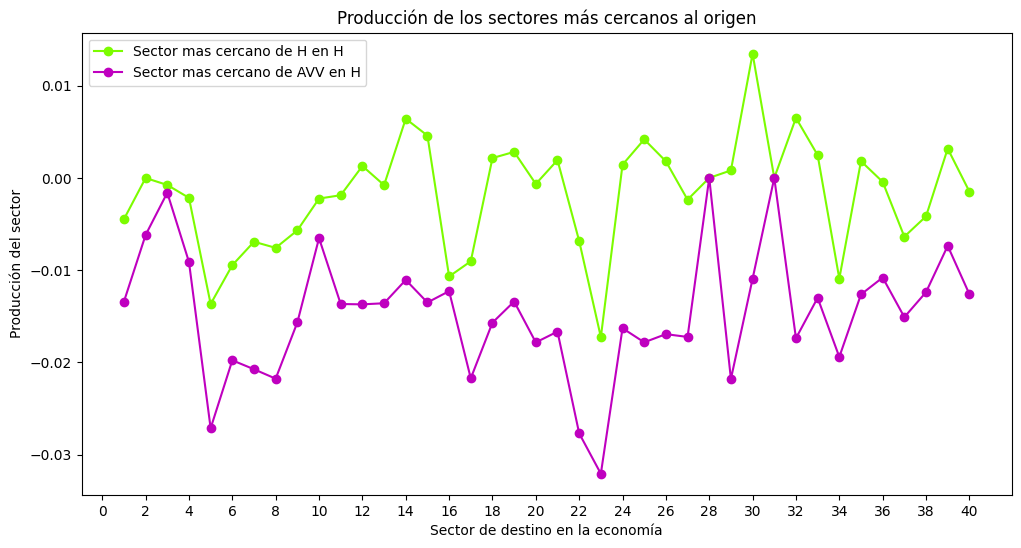

In [ ]:
#los valores que toma la matriz H para el secto más cerca al origen en Avv
produccion_H_AVV_cercano=H[sector_AVV_cercano]
#los valores que toma la matriz H para el secto más cerca al origen en H
produccion_H_cercano=H[sector_H_cercano]

#Graficamos

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(range(1,41), produccion_H_cercano,color="lawngreen",marker="o",label="Sector mas cercano de H en H")
ax.plot(range(1,41), produccion_H_AVV_cercano,color="m",marker="o",label="Sector mas cercano de AVV en H")
ax.legend()
ax.set_xlabel("Sector de destino en la economía")
ax.set_ylabel("Producción del sector")
ax.set_xticks(range(0,41,2))
ax.set_title("Producción de los sectores más cercanos al origen")

Aquí podemos observar que los valores del sector más cercano al origen en la matriz $A_{VV}$ resulta más negativo que el otro al aplicarle la matriz $H$, a pesar de tener comportamientos similares. Esto nos lleva a pensar que, además de reforzar la relación de los sectores relevantes en $A_{VV}$, la matriz $H$ podría también volver negativos a aquellos que no tienen tanta relevancia, para restarles importancia.